In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTAR LIBRERIAS, MÓDULOS Y FUNCIONES NECESARIAS**

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate
from sklearn.utils import resample, shuffle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

**LECTURA, LIMPIEZA, ANÁLISIS DESCRIPTIVO Y PREPARACIÓN DE LOS DATOS**

Lectura y limpieza

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_conductivity.csv' ,sep=';')
df=df.dropna()
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


Análsis descriptivo

In [26]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [27]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [29]:
df['number_of_elements'].value_counts(),df['range_Valence'].value_counts(), df['range_atomic_radius'].value_counts()

(5    5792
 4    4496
 3    3895
 2    3280
 6    2666
 7     774
 1     285
 8      61
 9      14
 Name: number_of_elements, dtype: int64,
 1    7387
 2    5131
 3    4335
 4    2321
 0    1398
 5     686
 6       5
 Name: range_Valence, dtype: int64,
 205    6141
 171    3124
 139     442
 199     358
 53      317
        ... 
 245       1
 99        1
 200       1
 197       1
 163       1
 Name: range_atomic_radius, Length: 195, dtype: int64)

Preparacnión de los datos co Pipeline(uno con OneHotencoder para aplicar codificacion onehot sobre columnas categoricas y otro con StandardScaler para estandarizar columnas numericas) y ColumnTransformer(para aplicar los pipeline en las correspondientes columnas)

In [30]:
categoricas = ['number_of_elements','range_Valence']
print(f"Las columnas categoricas son: {categoricas}")

#Define numeric columns
numericas = ['mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence','wtd_range_Valence', 'std_Valence', 'wtd_std_Valence']
print(f"Las columnas numericas son: {numericas}")


cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])


num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categoricas),
                                               ('num', num_pipe, numericas)])

preprocessor.fit(df)

x = pd.DataFrame(preprocessor.transform(df))

display(x)

Las columnas categoricas son: ['number_of_elements', 'range_Valence']
Las columnas numericas son: ['mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmea

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.663693,-0.907755,-0.752156,-0.805912,-0.711705,0.186292,0.035183,-0.406166,-0.838372,-0.520070
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.681175,-1.147084,-0.752156,-1.116731,-0.719454,0.664971,-0.014779,-0.362352,-0.426866,-0.450821
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.664061,-0.907755,-0.740164,-0.805912,-0.700728,0.186292,-0.062235,-0.376957,-0.838372,-0.503304
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.663877,-0.907755,-0.746160,-0.805912,-0.706224,0.186292,-0.010538,-0.391562,-0.838372,-0.511524
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.663324,-0.907755,-0.764149,-0.805912,-0.722618,0.186292,0.113627,-0.435376,-0.838372,-0.538178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.779140,0.049562,0.337829,0.159787,0.394987,0.208923,-0.366001,0.701200,-0.838372,-0.388706
21259,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.946880,-0.955620,-0.928046,-0.848370,-0.865598,0.759220,0.747878,-0.591160,-0.906487,-1.011981
21260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.403793,1.246207,1.382509,1.353046,1.469098,-1.548333,-1.583774,1.755341,-0.700159,-0.601416
21261,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.387117,1.246207,1.290167,1.353046,1.370404,-1.548333,-1.249706,0.743230,-0.700159,-0.464240


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, df['critical_temp'], train_size = 0.8, random_state = 0)

**CREACIÓN DE MODELOS Y SUS POSIBLES PARAMETROS, SU ENTRENAMIENTO CON CADA COMBINACIÓN DE PARAMETROS Y ELECCIÓN DEL MEJOR MODELO**

Creamos 2 diccionarios, uno con los modelos y otro con los parametros a probar con cada modelo

In [32]:
!pip install scikeras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from scikeras.wrappers import KerasRegressor

def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    return model

# Crea el modelo KerasRegressor
model1 = KerasRegressor(model=create_model, verbose=0)

models = {
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'CustomMLP': model1
}

params = {
    'GradientBoosting': {'n_estimators': [50, 100, 200],
                         'learning_rate': [0.01, 0.001],
                         'max_depth': [5, 6, 8]},
    'SVR': {'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']},
    'CustomMLP': {'optimizer': ['adam', 'rmsprop'],
                  'loss': ['mean_squared_error', 'mean_absolute_error'],
                  'epochs': [10, 20, 30],
                  'batch_size': [32, 64, 128]},
}

Utilizamos GridSearchCV para entrenar cada modelo con cada una de las posibles combinaciones entre parametros, y así poder elegir la mejor combinacion

In [33]:
# Buscar hiperparámetros utilizando validación cruzada
best_models = {}
best_mse = float('inf')  # Inicializar con un valor grande

for name, model in models.items():
  print(f"Processing model: {name}")
  print(f"Available keys in params: {params.keys()}")
  grid_search = GridSearchCV(model, params[name], cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
  grid_result = grid_search.fit(X_train, y_train)

  # Imprimir errores para cada combinación de modelo y parámetros
  print(f"Results for {name}:")
  means = grid_result.cv_results_['mean_test_score']
  params_list = grid_result.cv_results_['params']
  for parametros, mean_score in zip(params_list, means):
    print(f"Parameters: {parametros}, Mean Squared Error: {-mean_score}")

  best_models[name] = grid_result.best_estimator_
  best_mse_candidate = np.mean((best_models[name].predict(X_test) - y_test) ** 2)

  # Actualizar el mejor modelo si el MSE actual es mejor
  if best_mse_candidate < best_mse:
    best_model_name = name
    best_mse = best_mse_candidate

# Imprimir el mejor modelo y su error en el conjunto de prueba
best_model = best_models[best_model_name]
best_mse = np.mean((best_model.predict(X_test) - y_test) ** 2)
print(f'\nBest Model: {best_model_name} \nMean Squared Error on Test Set: {best_mse}')


Processing model: GradientBoosting
Available keys in params: dict_keys(['GradientBoosting', 'SVR', 'CustomMLP'])
Results for GradientBoosting:
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}, Mean Squared Error: 588.049446915421
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}, Mean Squared Error: 352.6120872338196
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}, Mean Squared Error: 200.85169032588658
Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50}, Mean Squared Error: 565.1814039476328
Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}, Mean Squared Error: 325.2204126632032
Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}, Mean Squared Error: 177.0840096882185
Parameters: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 50}, Mean Squared Error: 536.7480436834
Parameters: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}, Mean 

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Results for CustomMLP:
Parameters: {'batch_size': 32, 'epochs': 10, 'loss': 'mean_squared_error', 'optimizer': 'adam'}, Mean Squared Error: 209.82128399852309
Parameters: {'batch_size': 32, 'epochs': 10, 'loss': 'mean_squared_error', 'optimizer': 'rmsprop'}, Mean Squared Error: 217.44084274833727
Parameters: {'batch_size': 32, 'epochs': 10, 'loss': 'mean_absolute_error', 'optimizer': 'adam'}, Mean Squared Error: 225.92253723688015
Parameters: {'batch_size': 32, 'epochs': 10, 'loss': 'mean_absolute_error', 'optimizer': 'rmsprop'}, Mean Squared Error: 233.0853038626532
Parameters: {'batch_size': 32, 'epochs': 20, 'loss': 'mean_squared_error', 'optimizer': 'adam'}, Mean Squared Error: 189.70218327663156
Parameters: {'batch_size': 32, 'epochs': 20, 'loss': 'mean_squared_error', 'optimizer': 'rmsprop'}, Mean Squared Error: 197.78070765614837
Parameters: {'batch_size': 32, 'epochs': 20, 'loss': 'mean_absolute_error', 'optimizer': 'adam'}, Mean Squared Error: 213.99051653169604
Parameters: {'

In [34]:
from keras import metrics

print("MAE: ", np.array(metrics.mean_absolute_error(y_test,best_model.predict(X_test))))
print("MSE: ", np.array(metrics.mean_squared_error(y_test, best_model.predict(X_test))))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,best_model.predict(X_test))))
print("MAPE: ", np.array(metrics.mean_absolute_percentage_error(y_test, best_model.predict(X_test)),'\n'))

MAE:  8.558202310930398
MSE:  143.13204867474423
RMSE:  11.963780701548496
MAPE:  931


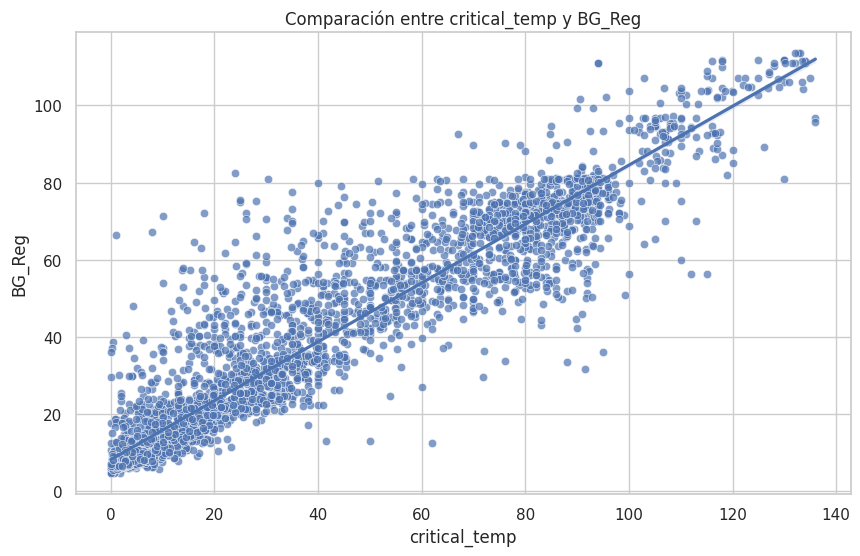

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

X_predict = X_test.copy()
X_predict['BG_Reg'] = best_model.predict(X_test)
test_plot = pd.DataFrame(X_predict[['BG_Reg']]).merge(y_test, how = 'left', left_index = True, right_index = True)
# Crear un gráfico de dispersión con una línea que conecta los puntos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = sns.scatterplot(data=test_plot, x='critical_temp', y='BG_Reg', alpha=0.7)

# Línea de regresión
sns.regplot(data=test_plot, x='critical_temp', y='BG_Reg', scatter=False, ax=scatter)

plt.xlabel('critical_temp')
plt.ylabel('BG_Reg')
plt.title('Comparación entre critical_temp y BG_Reg')

plt.show()
